# Resolution Plots
This aims to plot James' resolution figures.

Uses pickled files which can be obtained from `dof.ipynb`.

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pickle

In [167]:
f_a = pickle.load(open('grating_f_a.pkl', 'rb'))
lengths = f_a['lengths']
output = f_a['output']
harmonics = f_a['harmonics']

f_c = pickle.load(open('grating_f_c.pkl', 'rb'))
output_c = f_c['output']

In [130]:
base_frequency = 5

Text(0.5, 1.0, 'Modulation Transfer Function (f/6), in focus (?)')

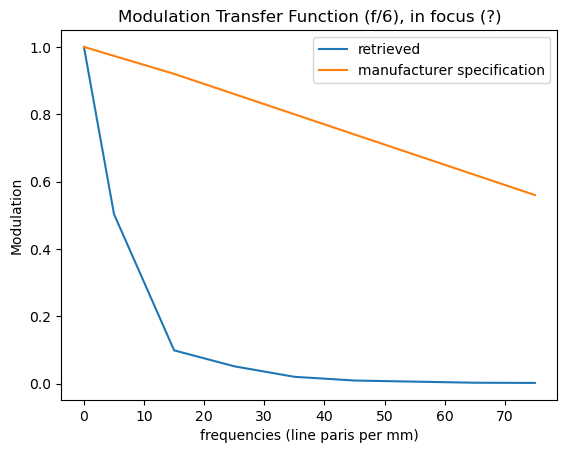

In [168]:
datasheet_freqs = np.arange(0,90,15)
datasheet_values = [1, 0.92, 0.83, 0.74, 0.65, 0.56]

plt.plot(harmonics*base_frequency, output[12], label='retrieved')
plt.plot(datasheet_freqs, datasheet_values, label='manufacturer specification')
plt.legend()
plt.xlabel('frequencies (line paris per mm)')
plt.ylabel('Modulation')
plt.title('Modulation Transfer Function (f/6), in focus (?)')


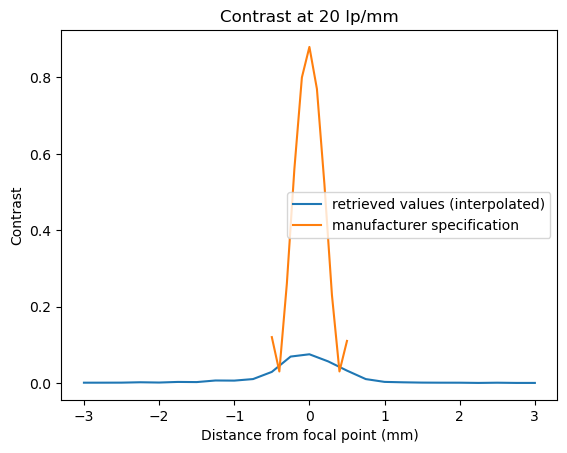

In [169]:


interp_location = 20
interpolated_values = []
for i in range(len(lengths)):
    interpolated_values.append(np.interp(20, harmonics*base_frequency, output[i]))

datasheet_distances = np.linspace(-0.5, 0.5, 11)
datasheet_contrasts = np.array([0.12, 0.03, 0.26, 0.56, 0.8, 0.88, 0.77, 0.52, 0.23,0.03, 0.11])

plt.plot(lengths, interpolated_values, label='retrieved values (interpolated)')
plt.plot(datasheet_distances, datasheet_contrasts, label='manufacturer specification')
plt.title('Contrast at 20 lp/mm')
plt.ylabel('Contrast')
plt.xlabel('Distance from focal point (mm)')
plt.legend()

Text(0.5, 1.0, 'Contrast at f/6')

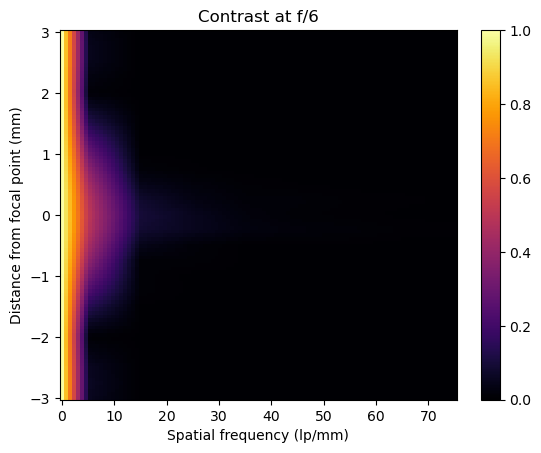

In [173]:
sampled_lengths = np.linspace(-3, 3, 100)
sampled_harmonics = np.linspace(0, 15, 100)
xg, yg = np.meshgrid(sampled_harmonics, sampled_lengths)
interp = sp.interpolate.RegularGridInterpolator((lengths, harmonics), output)
plt.pcolormesh(xg.T*base_frequency, yg.T, (interp((yg, xg)).T), cmap='inferno')
plt.xlabel('Spatial frequency (lp/mm)')
plt.ylabel('Distance from focal point (mm)')
plt.colorbar()
plt.title('Contrast at f/6')

Text(0.5, 1.0, 'Contrast at f/12')

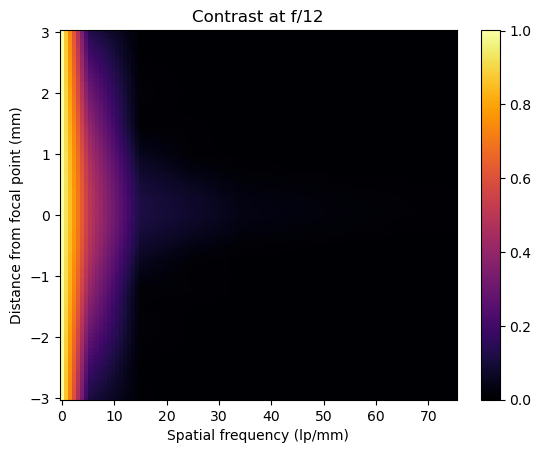

In [174]:
sampled_lengths = np.linspace(-3, 3, 100)
sampled_harmonics = np.linspace(0, 15, 100)
xg, yg = np.meshgrid(sampled_harmonics, sampled_lengths)
interp = sp.interpolate.RegularGridInterpolator((lengths, harmonics), output_c)
plt.pcolormesh(xg.T*base_frequency, yg.T, (interp((yg, xg)).T), cmap='inferno')
plt.xlabel('Spatial frequency (lp/mm)')
plt.ylabel('Distance from focal point (mm)')
plt.colorbar()
plt.title('Contrast at f/12')